## Libs

In [1]:
import matplotlib as matpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

# Using the Tensorflow backend (default).
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Activation, Dropout
from tensorflow import set_random_seed
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from keras.callbacks import EarlyStopping

# advanced plotting
import seaborn as sns
plt.style.use('seaborn-darkgrid')
%matplotlib inline

Using TensorFlow backend.


## Data

In [2]:
%store -r data_EEM
data_EEM.head(2)

,Adj Close
Date,
2009-06-01,27.405502
2009-06-08,27.511499


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a433a2f98>],
      dtype=object)

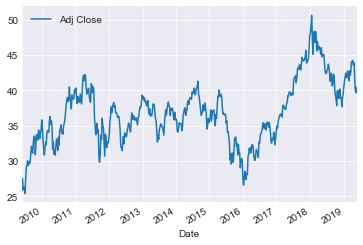

In [3]:
data_EEM.plot(subplots=True)

In [4]:
mm = MinMaxScaler(feature_range = (0,1))

In [5]:
dataset = mm.fit_transform(data_EEM)

In [6]:
#visualize a dataset[0:2]few data
dataset[0:2]

array([[0.07898306],
       [0.08319377]])

1 data every week. 52 data per year, 522 data in total.
* use the past 2 months (8 weeks) to predict 1 week ahead.
* create window of last 8 obs to train model
Parameters:
* history_size - size of past window
* target_size - how far in future model should learn to predict

6 years of training data = 313 weeks. 
Rest of the 209 weeks are for validation.

In [7]:
split = 0.6

train_size = int(len(dataset) * split)
#validation
test_size = len(dataset) - train_size

train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

print("training, test set: " + str((len(train), len(test))))

training, test set: (313, 209)


In [8]:
def input_dataset(dataset, window):
    data_X, data_y = [], []
    for i in range(len(dataset) - window - 1):
        a = dataset[i:(i + window), 0]
        data_X.append(a)
        data_y.append(dataset[i + window, 0])
    return(np.array(data_X), np.array(data_y))


In [9]:
# New testing and training sets for rolling forecast.
window = 1
train_X, train_Y = input_dataset(train, window)
test_X, test_Y = input_dataset(test, window)
print("Original train shape:")
print(train_X.shape)

# Reshape input data to match Keras format.
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
print("New train shape:")
print(train_X.shape)

Original train shape:
(311, 1)
New train shape:
(311, 1, 1)


## Univar Forecasting Model
* Part 1 - model will be given the last 4 obs and needs to learn to predict price in the next time step.

In [10]:
def fit_LSTM(train_X, train_Y, window = 1, neurons=128):
    set_random_seed(3)
    model = Sequential()
    
    model.add(LSTM(neurons, 
                   input_shape = (1, window)
                  ))
    model.add(Dense(1))
    model.compile(loss = "mean_squared_error", 
                  optimizer = "adam")
    earlyStop=EarlyStopping(monitor="val_loss",verbose=2,patience=15)
    model.fit(train_X, 
              train_Y, 
              epochs = 2000, 
              batch_size = 25,
              shuffle = False
             # verbose = 2
             )
    
    return(model)

# Fit the first model.
model1 = fit_LSTM(train_X, train_Y, window)

W0917 00:06:06.074143 4629005760 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0917 00:06:06.076245 4629005760 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0917 00:06:06.078665 4629005760 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0917 00:06:06.340672 4629005760 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0917 00:06:06.521005 4629005760 deprecation.py:323] From //anaconda3/li

Epoch 1/1000
311/311 [==============================] - 2s 6ms/step - loss: 0.1912
Epoch 2/1000
311/311 [==============================] - 0s 92us/step - loss: 0.1638
Epoch 3/1000
311/311 [==============================] - 0s 86us/step - loss: 0.1391
Epoch 4/1000
311/311 [==============================] - 0s 85us/step - loss: 0.1169
Epoch 5/1000
311/311 [==============================] - 0s 86us/step - loss: 0.0970
Epoch 6/1000
311/311 [==============================] - 0s 87us/step - loss: 0.0791
Epoch 7/1000
311/311 [==============================] - 0s 89us/step - loss: 0.0632
Epoch 8/1000
311/311 [==============================] - 0s 94us/step - loss: 0.0495
Epoch 9/1000
311/311 [==============================] - 0s 91us/step - loss: 0.0379
Epoch 10/1000
311/311 [==============================] - 0s 88us/step - loss: 0.0286
Epoch 11/1000
311/311 [==============================] - 0s 88us/step - loss: 0.0214
Epoch 12/1000
311/311 [==============================] - 0s 100us/step - lo

311/311 [==============================] - 0s 91us/step - loss: 0.0016
Epoch 193/1000
311/311 [==============================] - 0s 91us/step - loss: 0.0016
Epoch 194/1000
311/311 [==============================] - 0s 93us/step - loss: 0.0016
Epoch 195/1000
311/311 [==============================] - 0s 91us/step - loss: 0.0016
Epoch 196/1000
311/311 [==============================] - 0s 91us/step - loss: 0.0016
Epoch 197/1000
311/311 [==============================] - 0s 91us/step - loss: 0.0016
Epoch 198/1000
311/311 [==============================] - 0s 91us/step - loss: 0.0016
Epoch 199/1000
311/311 [==============================] - 0s 91us/step - loss: 0.0016
Epoch 200/1000
311/311 [==============================] - 0s 91us/step - loss: 0.0016
Epoch 201/1000
311/311 [==============================] - 0s 95us/step - loss: 0.0016
Epoch 202/1000
311/311 [==============================] - 0s 91us/step - loss: 0.0016
Epoch 203/1000
311/311 [==============================] - 0s 95us/ste

311/311 [==============================] - 0s 120us/step - loss: 0.0016
Epoch 383/1000
311/311 [==============================] - 0s 130us/step - loss: 0.0016
Epoch 384/1000
311/311 [==============================] - 0s 112us/step - loss: 0.0016
Epoch 385/1000
311/311 [==============================] - 0s 101us/step - loss: 0.0016
Epoch 386/1000
311/311 [==============================] - 0s 101us/step - loss: 0.0016
Epoch 387/1000
311/311 [==============================] - 0s 102us/step - loss: 0.0016
Epoch 388/1000
311/311 [==============================] - 0s 102us/step - loss: 0.0016
Epoch 389/1000
311/311 [==============================] - 0s 99us/step - loss: 0.0016
Epoch 390/1000
311/311 [==============================] - 0s 103us/step - loss: 0.0016
Epoch 391/1000
311/311 [==============================] - 0s 103us/step - loss: 0.0016
Epoch 392/1000
311/311 [==============================] - 0s 104us/step - loss: 0.0016
Epoch 393/1000
311/311 [==============================] - 0

311/311 [==============================] - 0s 99us/step - loss: 0.0016
Epoch 478/1000
311/311 [==============================] - 0s 97us/step - loss: 0.0016
Epoch 479/1000
311/311 [==============================] - 0s 100us/step - loss: 0.0016
Epoch 480/1000
311/311 [==============================] - 0s 97us/step - loss: 0.0016
Epoch 481/1000
311/311 [==============================] - 0s 98us/step - loss: 0.0016
Epoch 482/1000
311/311 [==============================] - 0s 96us/step - loss: 0.0016
Epoch 483/1000
311/311 [==============================] - 0s 98us/step - loss: 0.0016
Epoch 484/1000
311/311 [==============================] - 0s 96us/step - loss: 0.0016
Epoch 485/1000
311/311 [==============================] - 0s 97us/step - loss: 0.0016
Epoch 486/1000
311/311 [==============================] - 0s 97us/step - loss: 0.0016
Epoch 487/1000
311/311 [==============================] - 0s 96us/step - loss: 0.0016
Epoch 488/1000
311/311 [==============================] - 0s 97us/st

311/311 [==============================] - 0s 107us/step - loss: 0.0016
Epoch 573/1000
311/311 [==============================] - 0s 108us/step - loss: 0.0016
Epoch 574/1000
311/311 [==============================] - 0s 108us/step - loss: 0.0016
Epoch 575/1000
311/311 [==============================] - 0s 110us/step - loss: 0.0016
Epoch 576/1000
311/311 [==============================] - 0s 105us/step - loss: 0.0016
Epoch 577/1000
311/311 [==============================] - 0s 109us/step - loss: 0.0016
Epoch 578/1000
311/311 [==============================] - 0s 105us/step - loss: 0.0016
Epoch 579/1000
311/311 [==============================] - 0s 108us/step - loss: 0.0016
Epoch 580/1000
311/311 [==============================] - 0s 109us/step - loss: 0.0016
Epoch 581/1000
311/311 [==============================] - 0s 108us/step - loss: 0.0016
Epoch 582/1000
311/311 [==============================] - 0s 106us/step - loss: 0.0016
Epoch 583/1000
311/311 [==============================] - 

311/311 [==============================] - 0s 131us/step - loss: 0.0016
Epoch 761/1000
311/311 [==============================] - 0s 132us/step - loss: 0.0016
Epoch 762/1000
311/311 [==============================] - 0s 130us/step - loss: 0.0016
Epoch 763/1000
311/311 [==============================] - 0s 128us/step - loss: 0.0016
Epoch 764/1000
311/311 [==============================] - 0s 137us/step - loss: 0.0016
Epoch 765/1000
311/311 [==============================] - 0s 142us/step - loss: 0.0016
Epoch 766/1000
311/311 [==============================] - 0s 128us/step - loss: 0.0016
Epoch 767/1000
311/311 [==============================] - 0s 125us/step - loss: 0.0016
Epoch 768/1000
311/311 [==============================] - 0s 126us/step - loss: 0.0016
Epoch 769/1000
311/311 [==============================] - 0s 129us/step - loss: 0.0016
Epoch 770/1000
311/311 [==============================] - 0s 126us/step - loss: 0.0016
Epoch 771/1000
311/311 [==============================] - 

311/311 [==============================] - 0s 150us/step - loss: 0.0016
Epoch 949/1000
311/311 [==============================] - 0s 154us/step - loss: 0.0016
Epoch 950/1000
311/311 [==============================] - 0s 156us/step - loss: 0.0016
Epoch 951/1000
311/311 [==============================] - 0s 161us/step - loss: 0.0016
Epoch 952/1000
311/311 [==============================] - 0s 175us/step - loss: 0.0016
Epoch 953/1000
311/311 [==============================] - 0s 185us/step - loss: 0.0016
Epoch 954/1000
311/311 [==============================] - 0s 176us/step - loss: 0.0016
Epoch 955/1000
311/311 [==============================] - 0s 178us/step - loss: 0.0016
Epoch 956/1000
311/311 [==============================] - 0s 178us/step - loss: 0.0016
Epoch 957/1000
311/311 [==============================] - 0s 175us/step - loss: 0.0016
Epoch 958/1000
311/311 [==============================] - 0s 175us/step - loss: 0.0016
Epoch 959/1000
311/311 [==============================] - 

## Results 
### Predictions and model evaluations
The advantage of using the RMSE is that it's in the same unit as the original data, i.e. price/wk (1.000 passengers / month in Kaggle example).

In [11]:
def prediction_score(model, X, Y):
    # Make predictions using input data
    pred = mm.inverse_transform(model.predict(X))
    # Show Y on original scale
    original_data = mm.inverse_transform([Y])
    # RMSE.
    score = math.sqrt(mean_squared_error(original_data[0], pred[:, 0]))
    return(score, pred)

rmse_train, train_pred = prediction_score(model1, train_X, train_Y)
rmse_test, test_pred = prediction_score(model1, test_X, test_Y)

print("Training score: %.2f RMSE" % rmse_train)
print("Testing score: %.2f RMSE" % rmse_test)

Training score: 1.00 RMSE
Testing score: 1.02 RMSE


### Plotting and comparing original data, predictions, forecasts

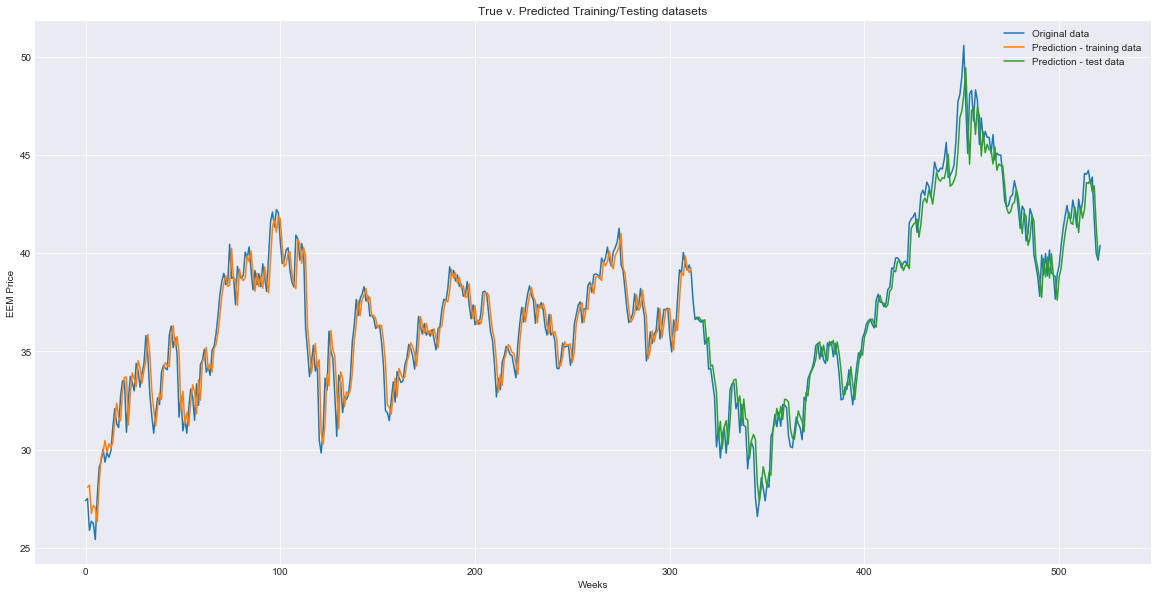

In [12]:
# Train predictions
train_pred_plot = np.empty_like(dataset)
train_pred_plot[:, :] = np.nan
train_pred_plot[window:len(train_pred) + window, :] = train_pred

# Test predictions
test_pred_plot = np.empty_like(dataset)
test_pred_plot[:, :] = np.nan
test_pred_plot[len(train_pred) + (window * 2) + 1:len(dataset) - 1, :] = test_pred

#plot
plt.figure(figsize = (20, 10))
plt.plot(mm.inverse_transform(dataset), label = 'Original data')
plt.plot(train_pred_plot, label = 'Prediction - training data')
plt.plot(test_pred_plot, label = 'Prediction - test data')
plt.xlabel('Weeks')
plt.ylabel('EEM Price')
plt.title('True v. Predicted Training/Testing datasets')
plt.legend()
plt.show()

In [13]:
LSTM_pred_EEM = pd.DataFrame(test_pred)
%store LSTM_pred_EEM

Stored 'LSTM_pred_EEM' (DataFrame)
